In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2020.csv', dtype = {'fips': str})
climate_2020 = ur_files.compute()
climate_2020 = climate_2020.loc[:, ~climate_2020.columns.str.contains('^Unnamed')]
climate_2020.head()

,fips,county,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate
0,01001,Autauga,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0,18.014870
1,01003,Baldwin,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0,22.242866
2,01005,Barbour,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0,21.536618
3,01007,Bibb,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0,15.950229
4,01009,Blount,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0,22.460651


In [4]:
climate_2020 = climate_2020[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index','rurality','SuicideDeathRate']]

In [5]:
climate_2020 = climate_2020.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2020.iloc[:, 1:-1].values
y = climate_2020.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.23507258, 0.17557451, 0.05218198, 0.05383046, 0.04657574,
       0.04164539, 0.04602137, 0.05149058, 0.00577198, 0.03664622,
       0.0608987 , 0.11330772, 0.08098277])

In [10]:
len(rf.feature_importances_)

13

In [11]:
columns = climate_2020.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'rurality']

In [13]:
len(columns)

13

Text(0.5, 0, 'Random Forest Feature Importance')

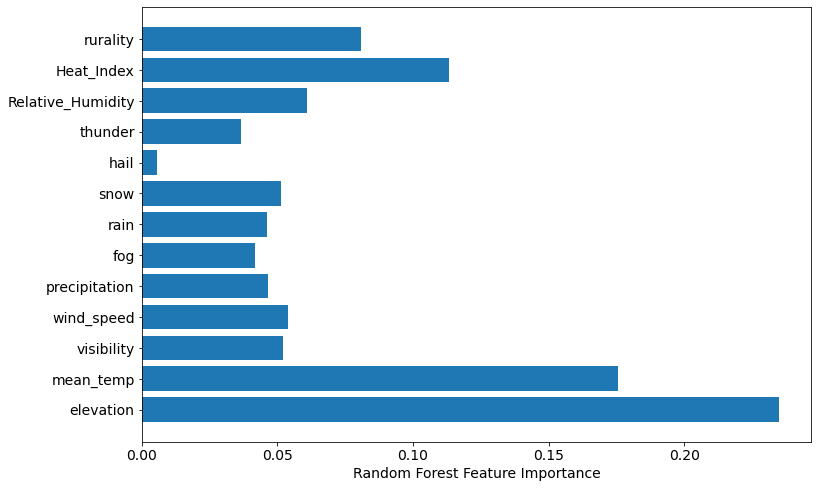

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8,  9,  5,  6,  4,  7,  2,  3, 10, 12, 11,  1,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00577198, 0.03664622, 0.04164539, 0.04602137, 0.04657574,
       0.05149058, 0.05218198, 0.05383046, 0.0608987 , 0.08098277,
       0.11330772, 0.17557451, 0.23507258])

Text(0.5, 0, 'Random Forest Feature Importance')

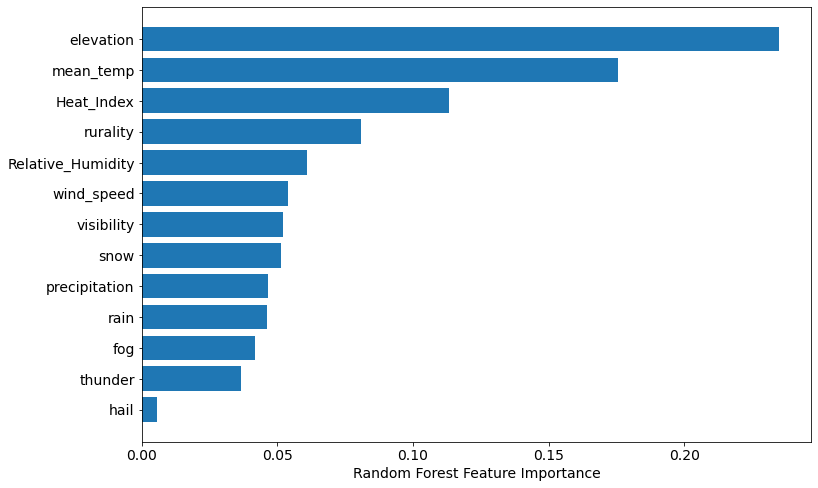

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

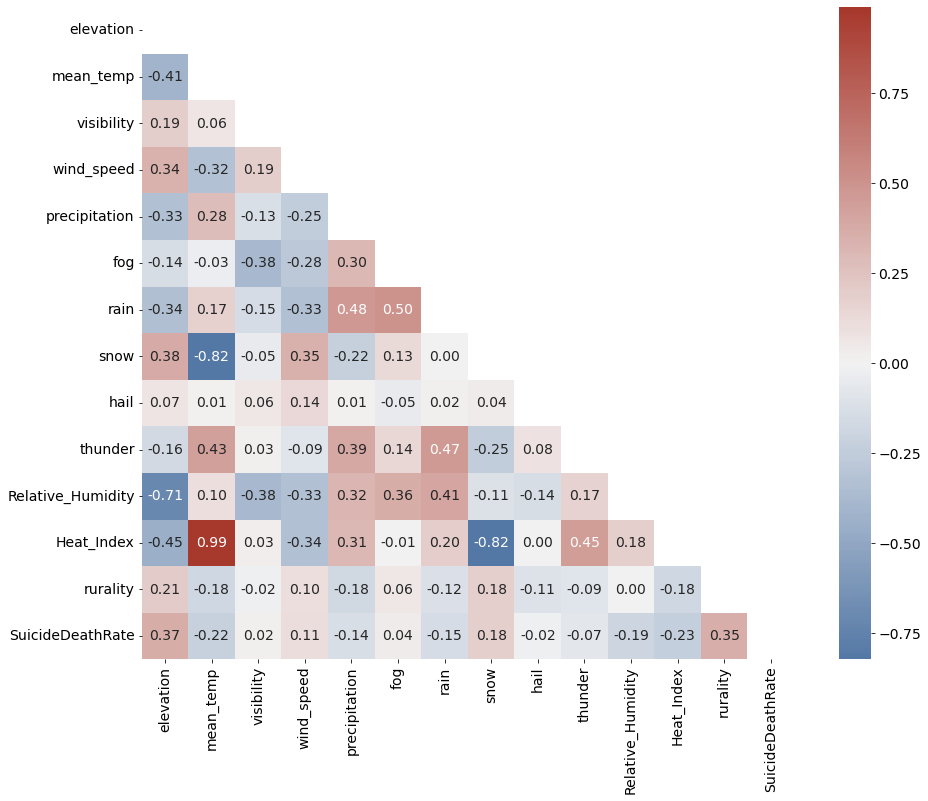

In [21]:
correlation_matrix(climate_2020)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2020.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2020 = ur_files.compute()
social_2020 = social_2020.loc[:, ~social_2020.columns.str.contains('^Unnamed')]
social_2020.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,01001,29804.0,0.152118,0.116403,0.166688,0.054131,0.189026,0.015724,0.038739,0.152591,0.035818,0.236219,0.260231,0.647028,0.010388,0.276040,"Autauga County, AL",18.014870
1,01003,33751.0,0.091737,0.100390,0.108923,0.031256,0.205768,0.015230,0.167139,0.204848,0.043809,0.215279,0.171030,0.470731,0.013533,0.183638,"Baldwin County, AL",22.242866
2,01005,20074.0,0.285999,0.261505,0.276632,0.111457,0.307314,0.037546,0.014100,0.190881,0.067907,0.208663,0.547191,0.625344,0.116279,0.540406,"Barbour County, AL",21.536618
3,01007,22626.0,0.180981,0.203478,0.319448,0.066263,0.289358,0.012536,0.024683,0.164298,0.021306,0.204881,0.255833,0.486243,0.074059,0.367041,"Bibb County, AL",15.950229
4,01009,25457.0,0.137361,0.184483,0.224651,0.050790,0.247931,0.018156,0.006843,0.179759,0.067410,0.231530,0.133149,0.525806,0.009765,0.225584,"Blount County, AL",22.460651


In [23]:
social_2020['SuicideDeathRate'].isna().sum()

88

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2020 = social_2020.dropna(how = 'any')

In [25]:
social_2020.shape

(3132, 18)

In [26]:
X = social_2020.iloc[:, 1:-2].values
y = social_2020.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0661879 , 0.03435642, 0.07855576, 0.09421851, 0.08068803,
       0.03763316, 0.18417235, 0.06431916, 0.08511909, 0.05712387,
       0.0437911 , 0.05089328, 0.04631123, 0.03387728, 0.04275286])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2020.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2020.shape

(3132, 18)

In [32]:
climate_2020.shape

(2973, 15)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

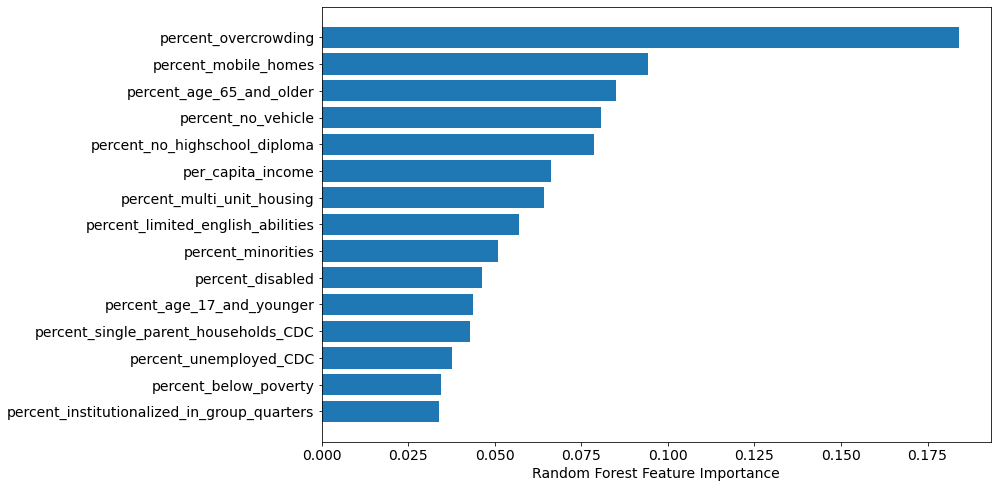

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

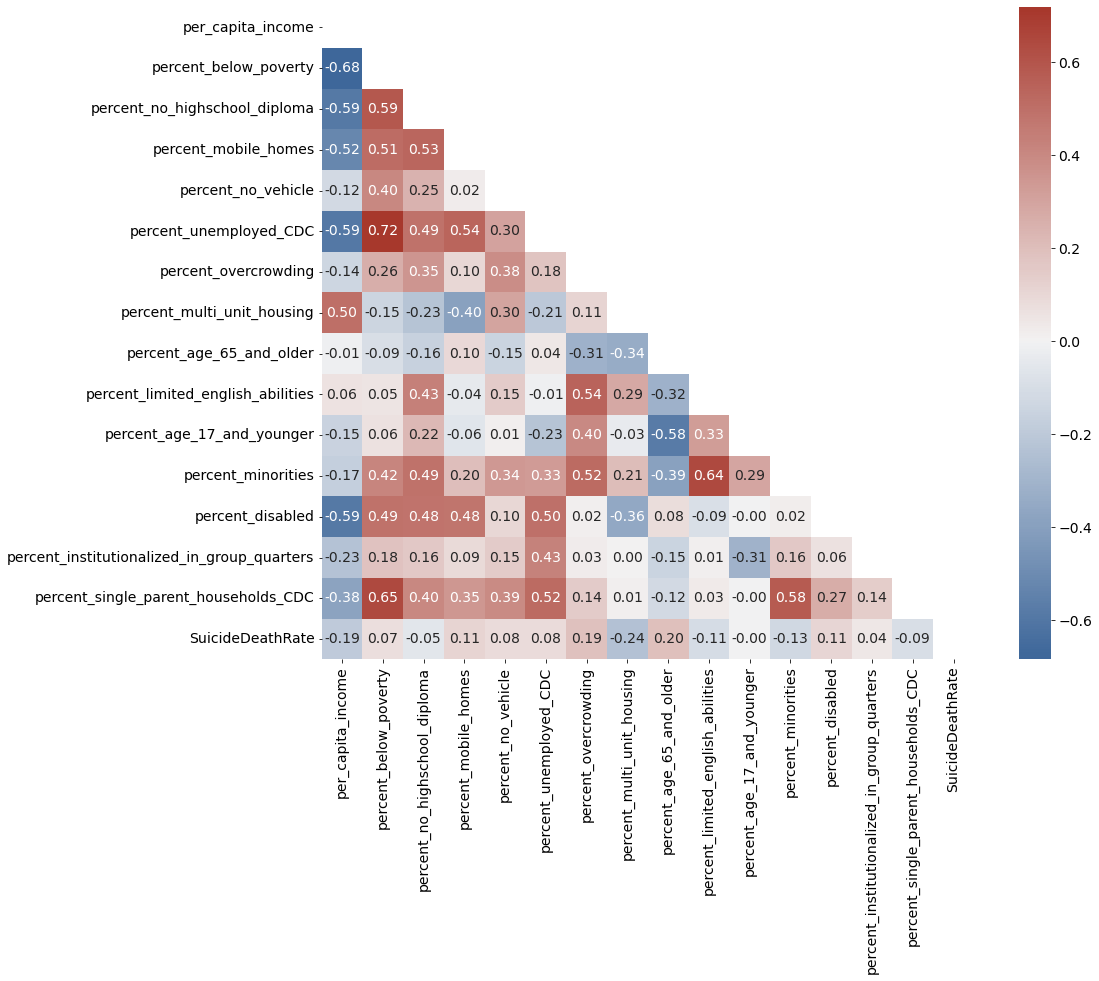

In [36]:
correlation_matrix(social_2020)

## find the rank of importances of all factors

In [37]:
df_total = social_2020.merge(climate_2020, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality
0,01001,29804.0,0.152118,0.116403,0.166688,0.054131,0.189026,0.015724,0.038739,0.152591,...,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0
1,01003,33751.0,0.091737,0.100390,0.108923,0.031256,0.205768,0.015230,0.167139,0.204848,...,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0
2,01005,20074.0,0.285999,0.261505,0.276632,0.111457,0.307314,0.037546,0.014100,0.190881,...,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0
3,01007,22626.0,0.180981,0.203478,0.319448,0.066263,0.289358,0.012536,0.024683,0.164298,...,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0
4,01009,25457.0,0.137361,0.184483,0.224651,0.050790,0.247931,0.018156,0.006843,0.179759,...,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'rurality'],
      dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder','rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2972, 31)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,precipitation,Relative_Humidity,Heat_Index,fog,rain,snow,hail,thunder,rurality,SuicideDeathRate
0,01001,"Autauga County, AL",0.152118,29804.0,0.189026,0.116403,0.152591,0.236219,0.647028,0.276040,...,0.190582,72.441193,66.733307,30.117647,155.000000,0.705882,0.0,45.529412,3.0,18.014870
1,01003,"Baldwin County, AL",0.091737,33751.0,0.205768,0.100390,0.204848,0.215279,0.470731,0.183638,...,0.080860,78.214097,69.488485,13.488372,34.906977,0.000000,0.0,11.488372,4.0,22.242866
2,01005,"Barbour County, AL",0.285999,20074.0,0.307314,0.261505,0.190881,0.208663,0.625344,0.540406,...,0.096706,72.878378,59.999685,16.000000,39.888889,0.000000,0.0,8.888889,6.0,21.536618
3,01007,"Bibb County, AL",0.180981,22626.0,0.289358,0.203478,0.164298,0.204881,0.486243,0.367041,...,0.156465,73.841053,63.784285,24.250000,109.500000,0.250000,0.0,36.250000,2.0,15.950229
4,01009,"Blount County, AL",0.137361,25457.0,0.247931,0.184483,0.179759,0.231530,0.525806,0.225584,...,0.133215,69.557608,62.180748,11.312500,74.125000,0.750000,0.0,22.187500,2.0,22.460651


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.01369929, 0.02032721, 0.01638102, 0.02442797, 0.04091266,
       0.01939621, 0.03397397, 0.01558241, 0.03232943, 0.0320142 ,
       0.02116635, 0.0471304 , 0.09059625, 0.02539804, 0.01626972,
       0.18152594, 0.05086369, 0.02477276, 0.02331751, 0.02861664,
       0.03164759, 0.06055601, 0.01800849, 0.02928245, 0.02044665,
       0.00352467, 0.01632612, 0.06150634])

In [47]:
len(rf.feature_importances_)

28

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

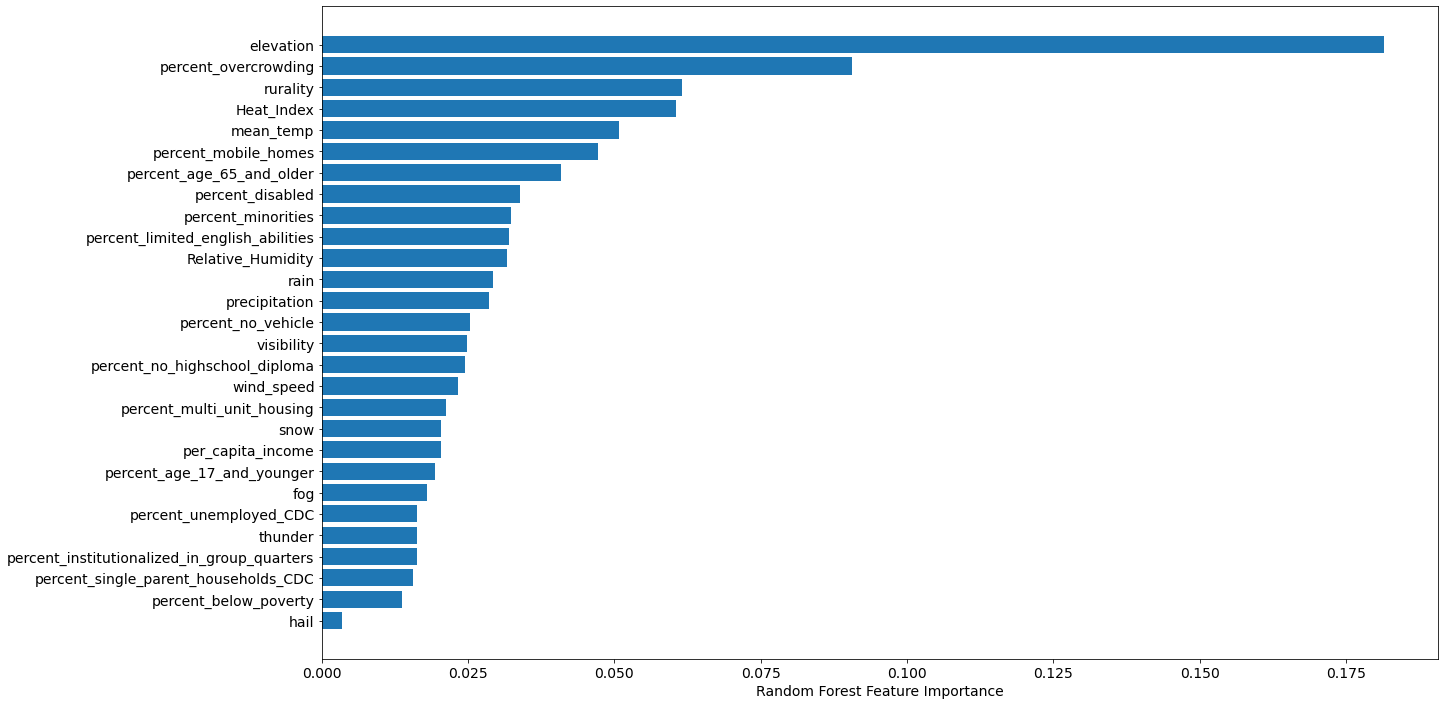

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Using lightgbm algorithm

In [52]:
from pprint import pprint
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings
from sklearn import metrics

In [53]:
climate_2020.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate
0,01001,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0,18.014870
1,01003,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0,22.242866
2,01005,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0,21.536618
3,01007,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0,15.950229
4,01009,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0,22.460651


In [54]:
def divideRange(rate):
    if rate > 0 and rate < 10:
        return 'low: 0-10'
    elif rate >=10 and rate < 15:
        return 'low to moderate: 10-15'
    elif rate >= 15 and rate < 20:
        return 'moderate: 15-20'
    elif rate >= 20 and rate < 25:
        return 'moderate to high: 20-25'
    elif rate >= 25 and rate < 30:
        return 'high: 25-30'
    else:
        return 'very high: >=30'

In [55]:
climate_2020['SuicideRateRange'] = climate_2020['SuicideDeathRate'].apply(divideRange)

In [56]:
climate_2020.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate,SuicideRateRange
0,01001,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0,18.014870,moderate: 15-20
1,01003,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0,22.242866,moderate to high: 20-25
2,01005,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0,21.536618,moderate to high: 20-25
3,01007,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0,15.950229,moderate: 15-20
4,01009,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0,22.460651,moderate to high: 20-25


In [57]:
climate = climate_2020.drop(['SuicideDeathRate'], axis = 1)

In [58]:
climate.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideRateRange
0,01001,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0,moderate: 15-20
1,01003,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0,moderate to high: 20-25
2,01005,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0,moderate to high: 20-25
3,01007,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0,moderate: 15-20
4,01009,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0,moderate to high: 20-25


In [59]:
climate = climate[['fips','elevation', 'rurality', 'mean_temp', 'precipitation', 'visibility', 'SuicideRateRange']]

In [60]:
X = climate.iloc[:, 1:-1]
y = climate.iloc[:, -1]

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=21)

In [62]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=21)

In [63]:
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[20]	training's multi_logloss: 0.928934	valid_0's multi_logloss: 1.37042
[40]	training's multi_logloss: 0.681389	valid_0's multi_logloss: 1.36996
[60]	training's multi_logloss: 0.530445	valid_0's multi_logloss: 1.39788
[80]	training's multi_logloss: 0.420728	valid_0's multi_logloss: 1.43791
[100]	training's multi_logloss: 0.341736	valid_0's multi_logloss: 1.48561


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=21)

In [64]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9553
Testing accuracy 0.4511


In [65]:
plt.rcParams.update({'figure.figsize': (30.0, 22.0)})
plt.rcParams.update({'font.size': 22})

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

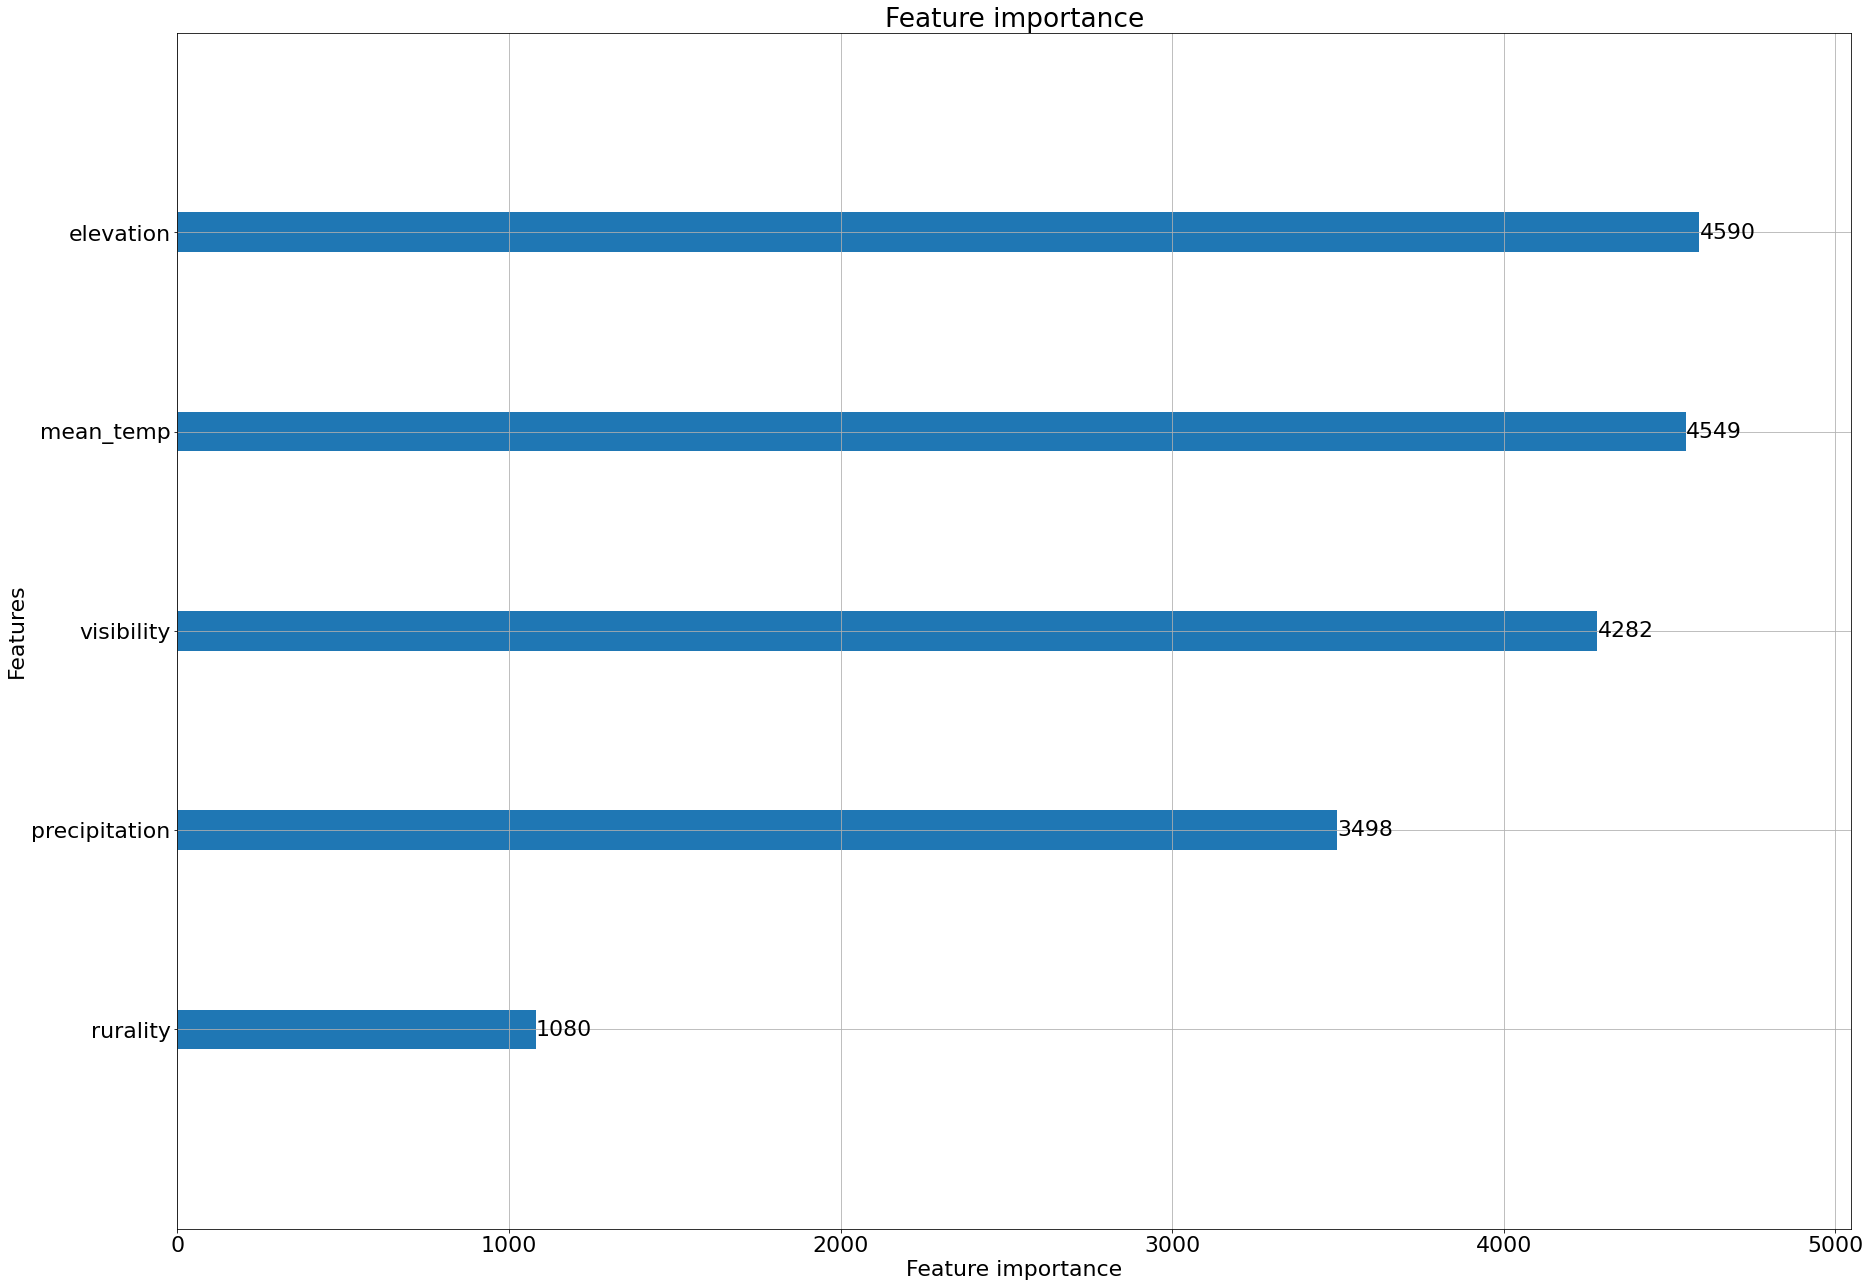

In [66]:
lgb.plot_importance(model)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

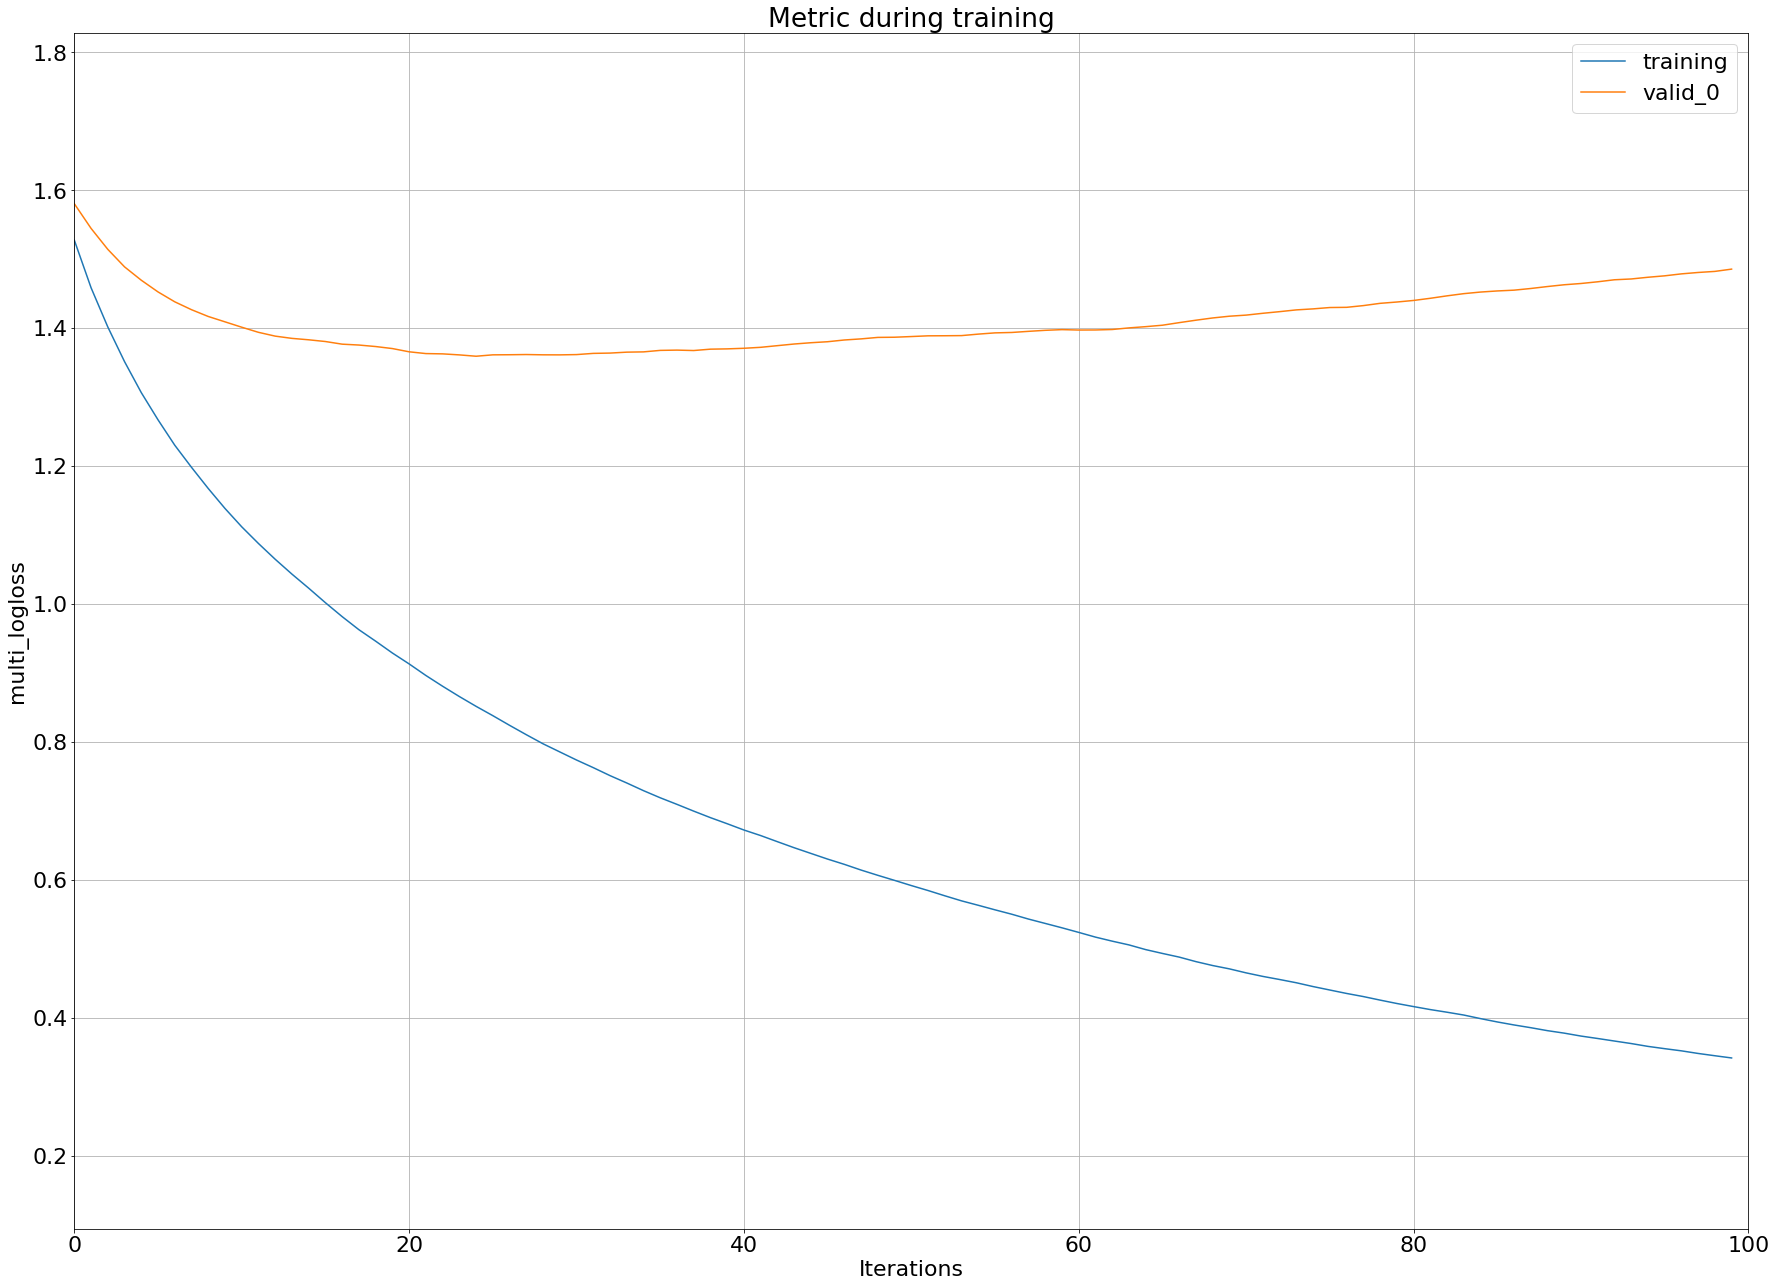

In [67]:
lgb.plot_metric(model)

In [68]:
import graphviz

In [69]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [70]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [71]:
featureNames = X.columns

In [72]:
y

0               moderate: 15-20
1       moderate to high: 20-25
2       moderate to high: 20-25
3               moderate: 15-20
4       moderate to high: 20-25
                 ...           
3137            very high: >=30
3138            very high: >=30
3139            very high: >=30
3140            very high: >=30
3141            very high: >=30
Name: SuicideRateRange, Length: 2973, dtype: object

In [73]:
targetName = list(y.unique())

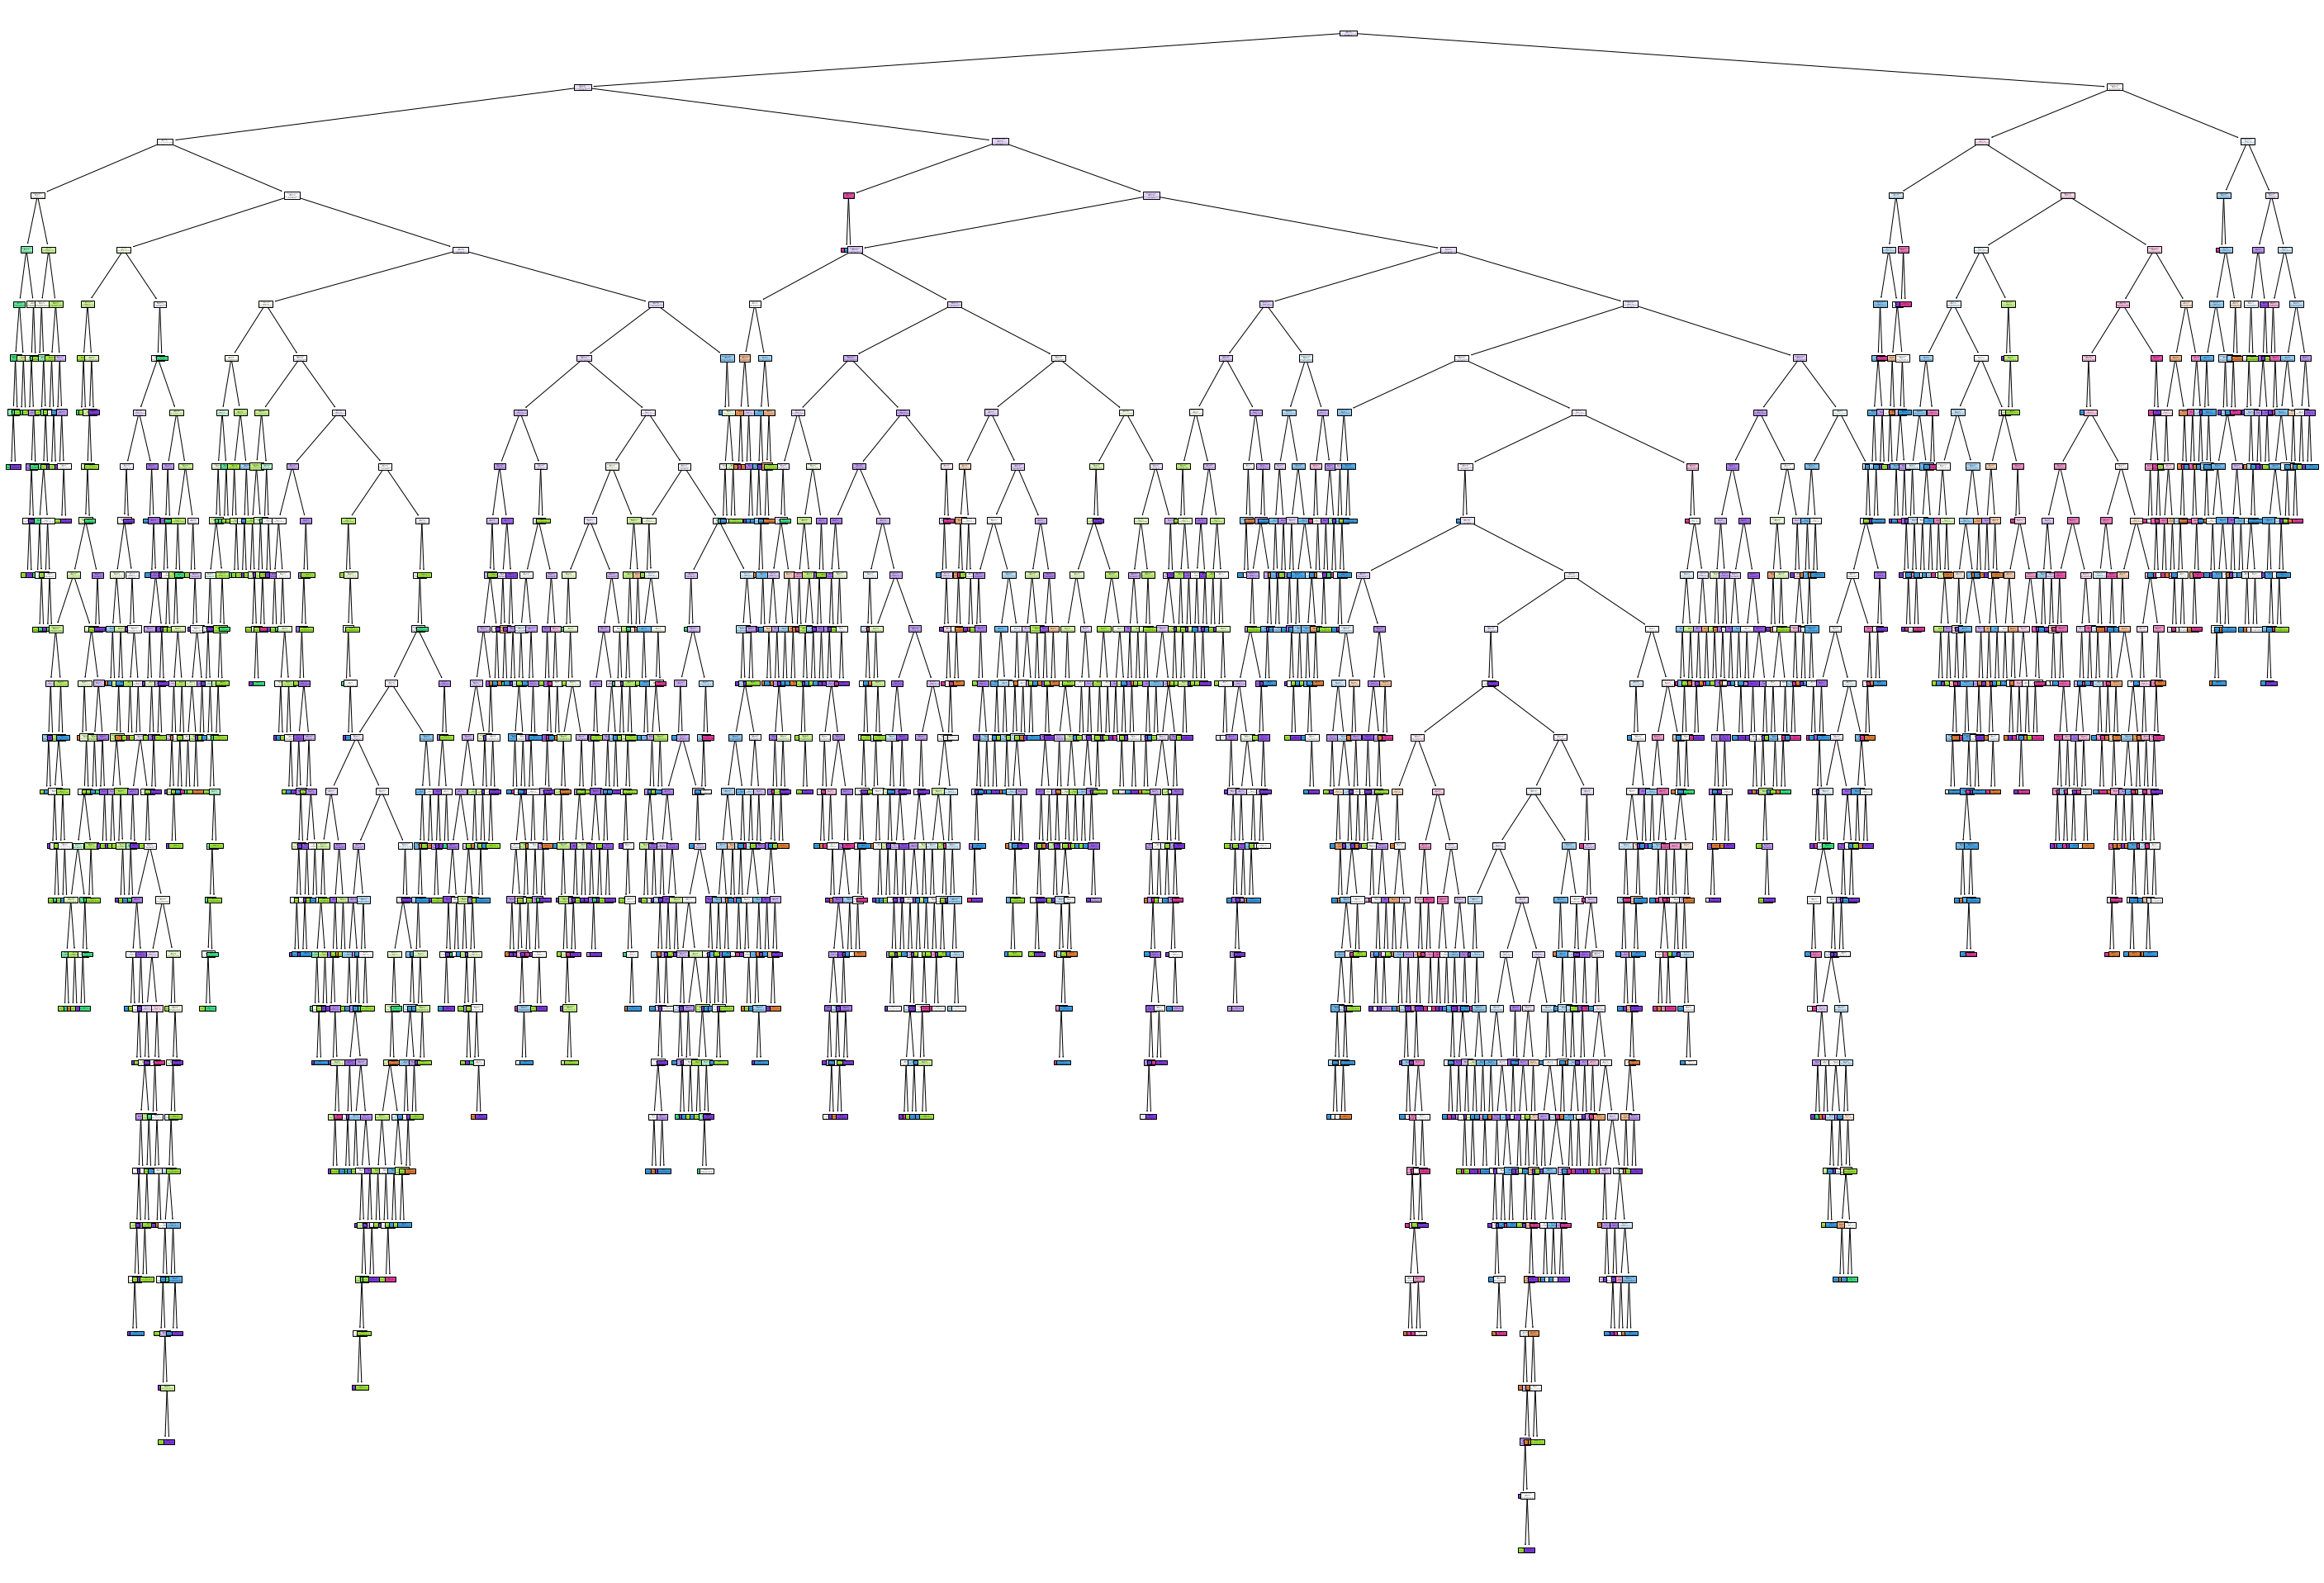

In [74]:
fig = plt.figure(figsize=(50,35))
_ = tree.plot_tree(clf, 
                   feature_names= featureNames,  
                   class_names= targetName,
                   filled=True)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


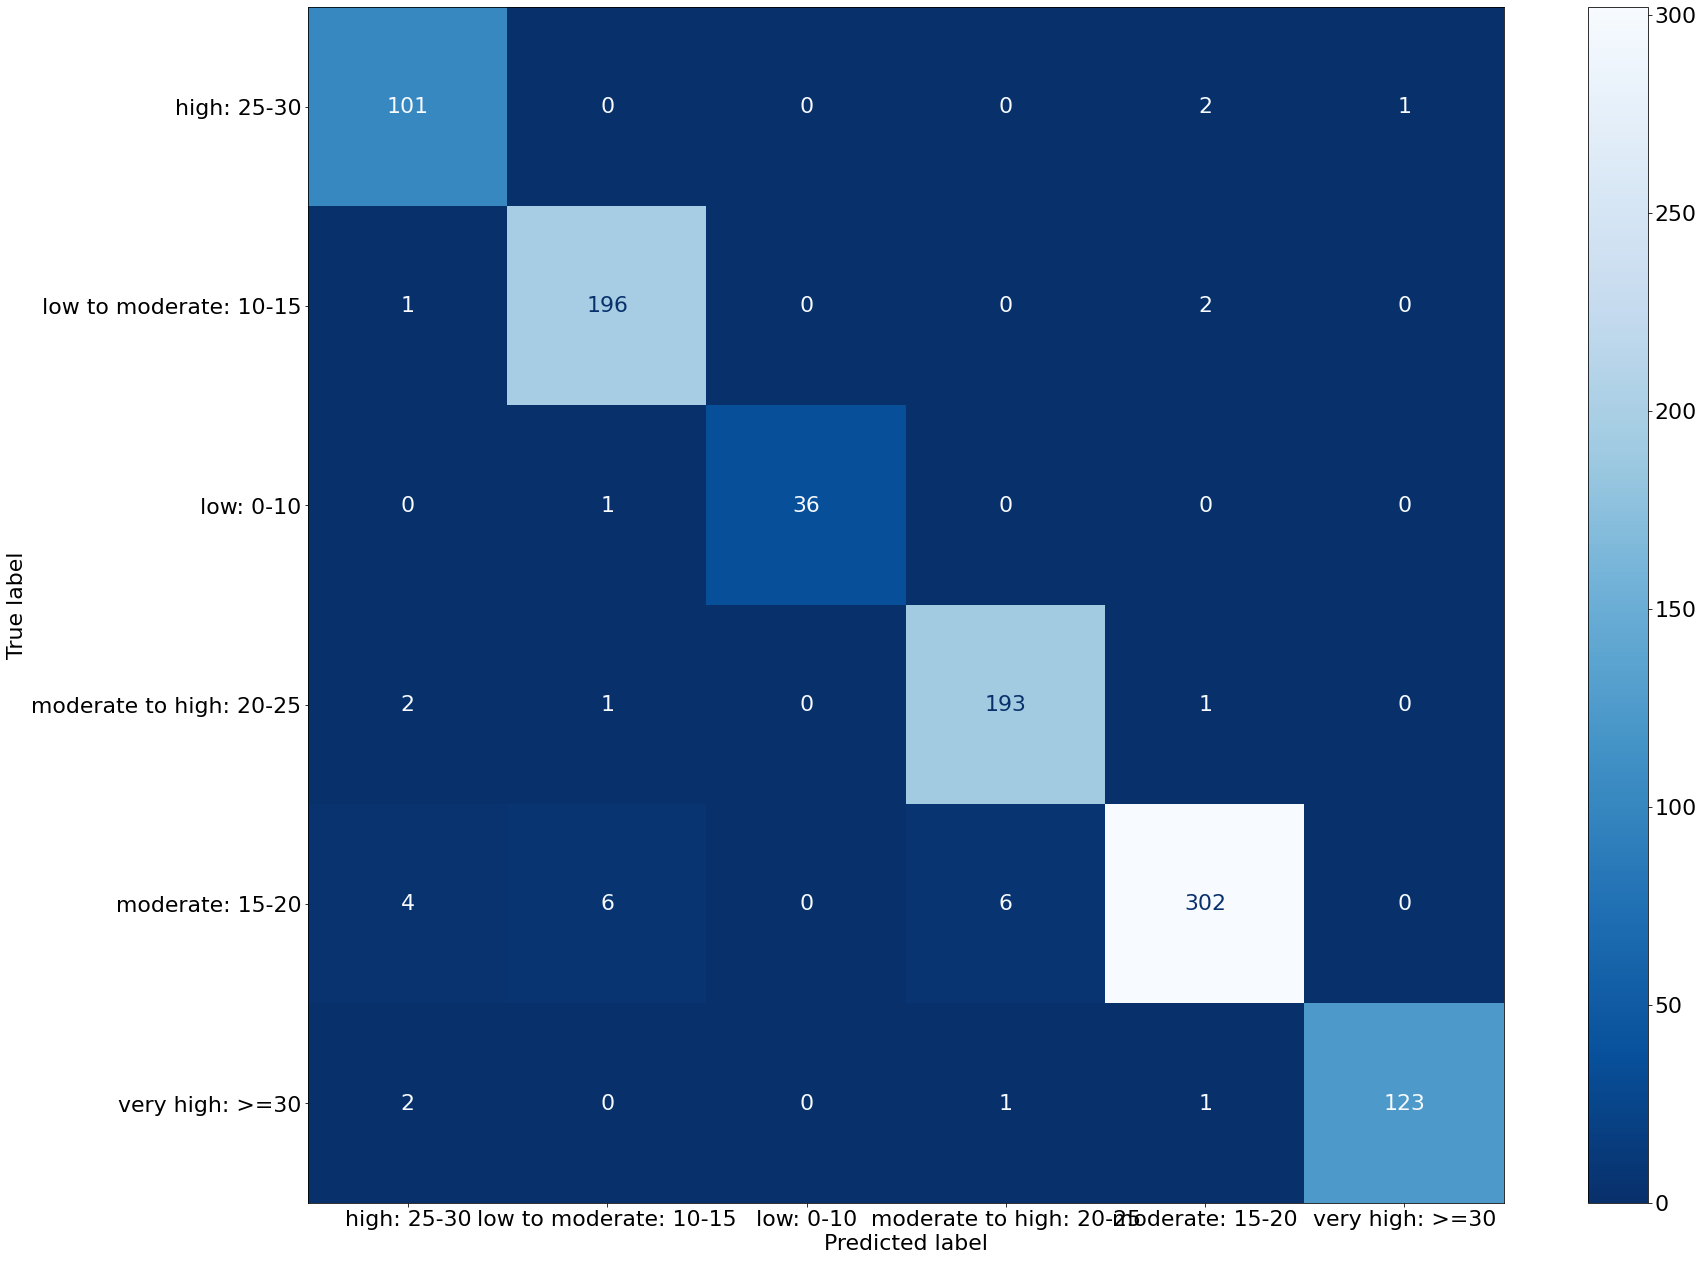

In [75]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

In [76]:
print(metrics.classification_report(y_test,model.predict(x_test)))

                         precision    recall  f1-score   support

            high: 25-30       0.92      0.97      0.94       104
 low to moderate: 10-15       0.96      0.98      0.97       199
              low: 0-10       1.00      0.97      0.99        37
moderate to high: 20-25       0.96      0.98      0.97       197
        moderate: 15-20       0.98      0.95      0.96       318
        very high: >=30       0.99      0.97      0.98       127

               accuracy                           0.97       982
              macro avg       0.97      0.97      0.97       982
           weighted avg       0.97      0.97      0.97       982



## SHAP

In [56]:
import xgboost
import shap

In [57]:
X = climate_2020.iloc[:, 1:-2]
y = climate_2020.iloc[:, -2].array

In [58]:
X

,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality
0,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0
1,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0
2,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0
3,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0
4,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,2148.033333,36.318033,9.558925,6.144536,0.002140,26.333333,59.000000,79.000000,0.0,14.666667,57.355772,32.345557,6.0
3138,2055.000000,44.184973,9.704372,10.570492,0.008767,25.000000,51.000000,64.000000,0.0,12.000000,47.900495,40.554793,5.0
3139,1960.585714,37.678337,9.054098,6.805191,0.046206,31.428571,65.714286,93.571429,0.0,9.285714,61.219379,34.502038,5.0
3140,2190.740000,42.571731,9.472776,9.053288,0.008787,46.200000,37.800000,94.800000,0.0,4.000000,49.138534,38.837652,5.0


In [59]:
y

<PandasArray>
[ 18.01487016844412,  22.24286592785461,  21.53661808701069,
 15.950228825699536,  22.46065066777242, 15.199473950846492,
  27.07825616030328,   24.6763433184394, 14.839098674058448,
 20.812863425860108,
 ...
  38.85046301594738, 21.035698818288683, 37.502983191844805,
  28.82847059993041,  29.99400119976005,  41.73809211926671,
  35.15103226864762,  35.43291165095012,  49.46821667078902,
  35.62127799333976]
Length: 2973, dtype: float64

In [60]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


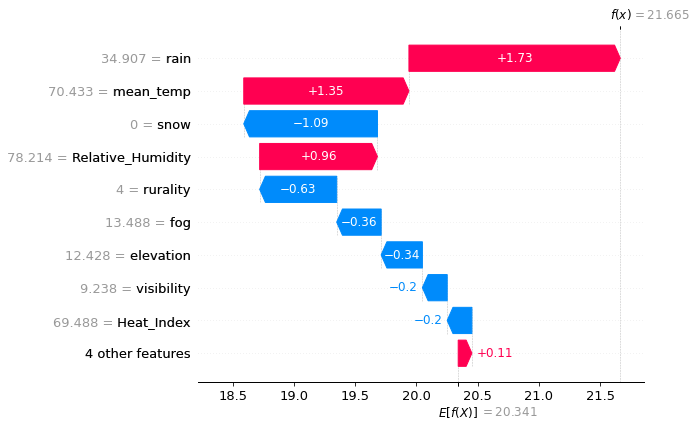

In [61]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

#### The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

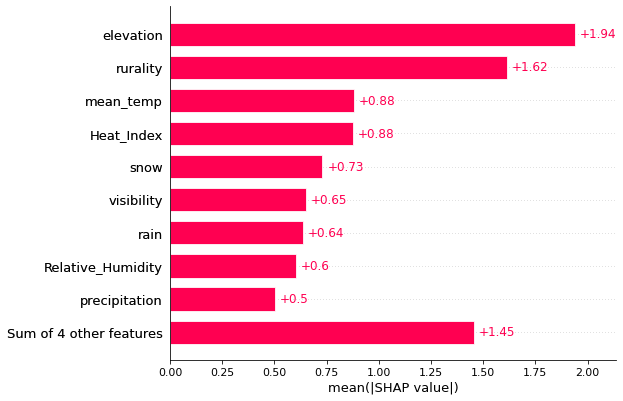

In [62]:
shap.plots.bar(shap_values)

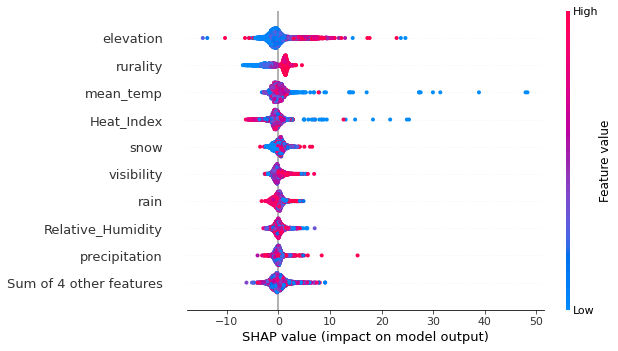

In [63]:
shap.plots.beeswarm(shap_values)

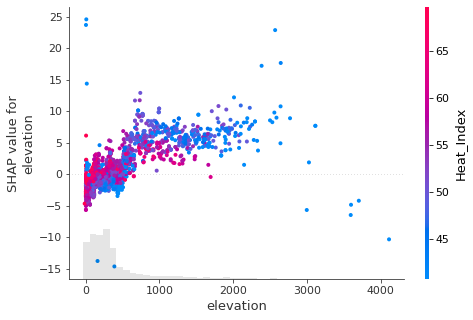

In [64]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

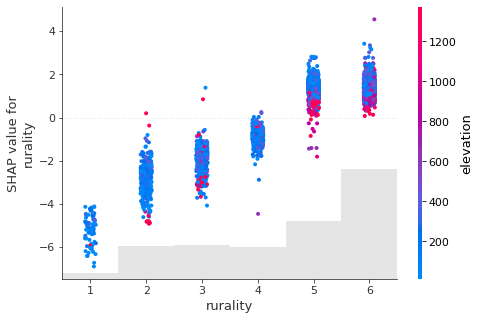

In [65]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

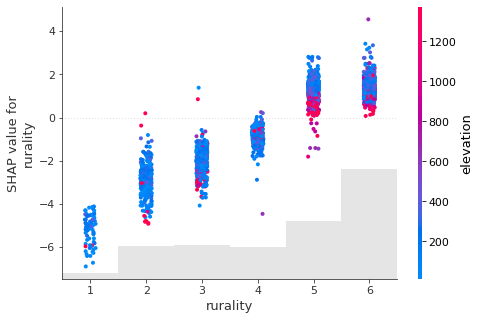

In [67]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

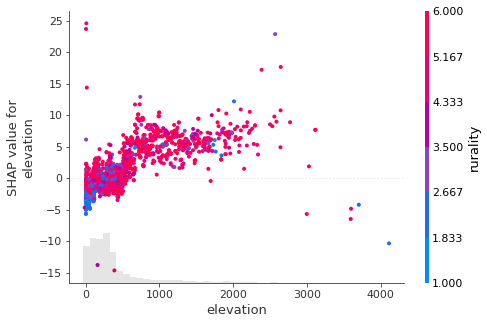

In [68]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

### scatter plot will pick the best feature to color by automatically

### social economic factors

In [87]:
social_2020.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,01001,29804.0,0.152118,0.116403,0.166688,0.054131,0.189026,0.015724,0.038739,0.152591,0.035818,0.236219,0.260231,0.647028,0.010388,0.276040,"Autauga County, AL",18.014870
1,01003,33751.0,0.091737,0.100390,0.108923,0.031256,0.205768,0.015230,0.167139,0.204848,0.043809,0.215279,0.171030,0.470731,0.013533,0.183638,"Baldwin County, AL",22.242866
2,01005,20074.0,0.285999,0.261505,0.276632,0.111457,0.307314,0.037546,0.014100,0.190881,0.067907,0.208663,0.547191,0.625344,0.116279,0.540406,"Barbour County, AL",21.536618
3,01007,22626.0,0.180981,0.203478,0.319448,0.066263,0.289358,0.012536,0.024683,0.164298,0.021306,0.204881,0.255833,0.486243,0.074059,0.367041,"Bibb County, AL",15.950229
4,01009,25457.0,0.137361,0.184483,0.224651,0.050790,0.247931,0.018156,0.006843,0.179759,0.067410,0.231530,0.133149,0.525806,0.009765,0.225584,"Blount County, AL",22.460651


In [88]:
X = social_2020.iloc[:, 1:-2]
y = social_2020.iloc[:, -1].array

In [89]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


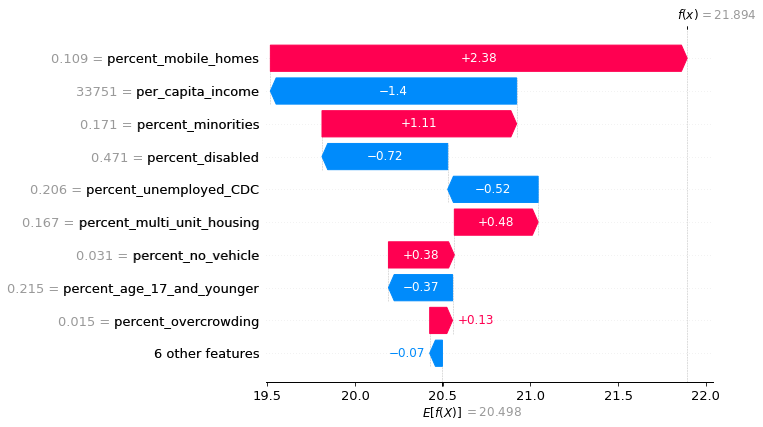

In [90]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

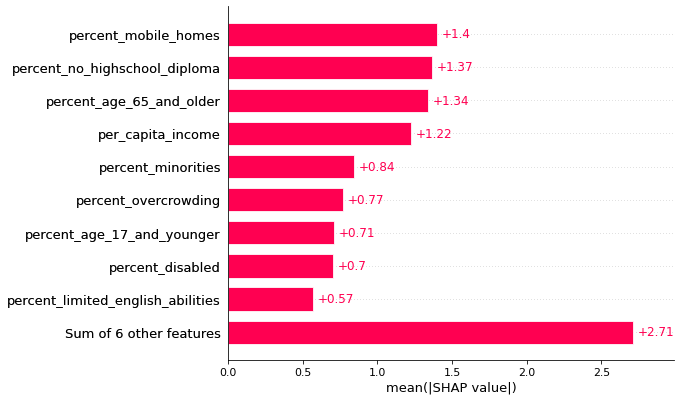

In [91]:
shap.plots.bar(shap_values)

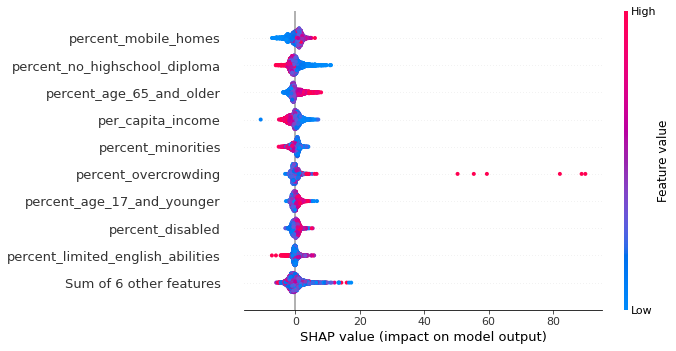

In [92]:
shap.plots.beeswarm(shap_values)

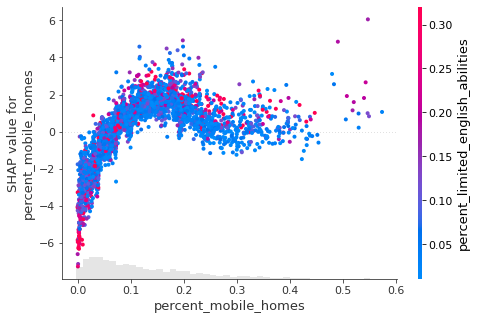

In [93]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)